# Python数据分析之Numpy

python有着大量功能强大的第三方库。这些第三方库可以大大得扩充Python的功能，我们在实际使用中往往也离不开这些第三方库。

NumPy是Python的一种开源的数值计算扩展。这种工具可用来存储和处理大型矩阵，比Python自身的嵌套列表( nested liststructure)结构要高效的多。NumPy( Numeric Python )提供了许多高级的数值编程工具。Numpy的一个重要特性是它的数组计算，是我们做数据分析必不可少的一个包。

导入python库使用关键字import，后面可以自定义库的简称，但是一般都将Numpy命名为np，pandas命名为pd。

使用前一定要先导入Numpy包，导入的方法有以下几种：

* `import numpy`
* `import numpy as np`
* `from numpy import *`

In [1]:
import numpy as np

# 1.Numpy的数组对象及其索引

## 数组上的数学操作

假如我们想将列表中的每个元素增加1，但列表不支持这样的操作：

In [3]:
a = [1, 2, 3, 4]
# a + 1 不能直接实现

In [4]:
[x + 1 for x in a]

[2, 3, 4, 5]

In [6]:
b = [2, 3, 4, 5]
a + b

[1, 2, 3, 4, 2, 3, 4, 5]

In [7]:
[x + y for (x, y) in zip(a, b)]

[3, 5, 7, 9]

与另一个数组相加，得到对应元素相加的结果（示例见上）

这样的操作比较麻烦，而且在数据量特别大的时候会非常耗时间。

如果我们使用Numpy，就会变得特别简单

In [8]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [9]:
a + 1

array([2, 3, 4, 5])

In [10]:
a * 2

array([2, 4, 6, 8])

In [11]:
b = np.array([2, 3, 4, 5])
a + b

array([3, 5, 7, 9])

## 产生数组

从列表产生数组：

In [12]:
l = [0, 1, 2, 3]
a = np.array(l)
a

array([0, 1, 2, 3])

从列表传入：

In [13]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

生成全0数组：

In [15]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

生成全1数组：

In [16]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [19]:
np.ones(5, dtype = 'bool') # 使用dtype指定数据类型

array([ True,  True,  True,  True,  True])

可以使用`fill`方法将数组设为指定值：

In [20]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [21]:
a.fill(5) # 让a数组里面每一个元素为5
# a.fill(2.5) # 会报错，因为传入的参数类型与之前数组元素的类型不一样
a

array([5, 5, 5, 5])

In [26]:
a = a.astype('float') # 更改数组元素的类型
a.fill(2.5) # 此时不会报错了
a

array([2.5, 2.5, 2.5, 2.5])

与列表不同，数组中要求所有元素的dtype是一样的，如果传入参数的类型与数组类型不一样，需要按照既有的类型进行转换。

还可以使用一些特定的方法生成特殊的数组

生成整数序列：

In [27]:
a = np.arange(1, 10)
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
a = np.arange(1, 10, 2 )
a

array([1, 3, 5, 7, 9])

生成等差数列：

In [30]:
a = np.linspace(1, 10, 21) # 生成一个从1到10一共21个元素的等差数列
a

array([ 1.  ,  1.45,  1.9 ,  2.35,  2.8 ,  3.25,  3.7 ,  4.15,  4.6 ,
        5.05,  5.5 ,  5.95,  6.4 ,  6.85,  7.3 ,  7.75,  8.2 ,  8.65,
        9.1 ,  9.55, 10.  ])

生成随机数：

In [31]:
np.random.rand(10)

array([0.26852583, 0.265649  , 0.21813074, 0.59200635, 0.54757398,
       0.98613607, 0.34433093, 0.03965331, 0.10438079, 0.15346764])

In [32]:
np.random.randn(10) # 生成服从标准正态分布的随机数

array([ 0.81092849,  0.33116094, -0.21344416, -0.61319661,  0.06970382,
       -0.28870489,  1.34078112, -0.20184256,  0.14981794, -0.23852597])

In [33]:
np.random.randint(1, 10, 10) # 生成1到10的10个随机整数 

array([6, 8, 1, 8, 3, 9, 7, 4, 8, 9])

## 数组属性

查看类型：

In [34]:
a

array([ 1.  ,  1.45,  1.9 ,  2.35,  2.8 ,  3.25,  3.7 ,  4.15,  4.6 ,
        5.05,  5.5 ,  5.95,  6.4 ,  6.85,  7.3 ,  7.75,  8.2 ,  8.65,
        9.1 ,  9.55, 10.  ])

In [35]:
type(a) # 查看a的类型

numpy.ndarray

查看数组中元素的数据类型：

In [36]:
a.dtype

dtype('float64')

查看形状，会返回一个元组，每个元素代表这一维的元素数目：

In [37]:
a.shape

(21,)

查看数组里面元素的数目：

In [38]:
a.size

21

查看数组的维度：

In [39]:
a.ndim

1

## 索引与切片

和列表类似，数组也支持索引和切片操作。

所以第一个元素：

In [40]:
a = np.array([0, 1, 2, 3])
a[0]

0

修改第一个元素的值：

In [41]:
a[0] = 10
a

array([10,  1,  2,  3])

切片（支持负索引）：

In [42]:
a = np.array([11, 12, 13, 14, 15])
a[1:3]

array([12, 13])

In [43]:
a[1:-2]

array([12, 13])

In [45]:
a[-4:3]

array([12, 13])

省略参数：

In [46]:
a[-2:]

array([14, 15])

In [47]:
a[::2]

array([11, 13, 15])

假设我们记录一部电影的累计票房：

In [48]:
ob = np.array([21000, 21800, 22240, 23450, 25000])
ob

array([21000, 21800, 22240, 23450, 25000])

可以这样计算每天的票房：

In [51]:
ob2 = ob[1:] - ob[:-1]
ob2

array([ 800,  440, 1210, 1550])

## 多维数组及属性

array还可以用来生成多为数组：

In [53]:
a = np.array([[0, 1, 2, 3],[10, 11, 12, 13]])
a

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13]])

事实上我们传入的是一个以列表为元素的列表，最终得到一个二维数组。

查看形状：

In [54]:
a.shape

(2, 4)

查看总的元素个数：

In [56]:
a.size

8

查看维度：

In [58]:
a.ndim

2

### 多维数组索引

对于二维数组，可以传入两个数字来索引：

In [59]:
a

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13]])

In [60]:
a[1, 3]

13

其中，1是行索引，3是列索引，中间用逗号隔开，事实上， Python会将它们看成一个元组(1,3)，然后按照顺序进行对应。

可以利用索引给它赋值：

In [61]:
a[1,3] = -1
a

array([[ 0,  1,  2,  3],
       [10, 11, 12, -1]])

事实上，我们还可以使用单个索引来索引一整行内容：

In [62]:
a[1]

array([10, 11, 12, -1])

Python会将这个单元组当成对第一维的索引，然后返回对应的内容。

In [63]:
a[:, 1] # 查看第二列

array([ 1, 11])

### 多维数组切片

多维数组，也支持切片操作：

In [66]:
a = np.array([[0,1,2,3,4,5],[10, 11, 12, 13, 14, 15], [20,21, 22, 23, 24, 25],[30, 31, 32, 33, 34, 35], [40, 41, 42, 43, 44, 45], [50, 51, 52, 53, 54, 55]])
a   

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

想得到第一行的第4个和第5个两个元素：

In [67]:
a[0, 3:5]

array([3, 4])

想得到最后两行的最后两列：

In [68]:
a[4:, 4:]

array([[44, 45],
       [54, 55]])

得到第三列：

In [69]:
a[:, 2]

array([ 2, 12, 22, 32, 42, 52])

每一维都支持切片的规则，包括负索引，省略：

    [lower:upper:step]

例如，取出3，5行的奇数列：

In [72]:
a[2::2, ::2]

array([[20, 22, 24],
       [40, 42, 44]])

### 切片是引用

切片在内存中使用的是引用机制。

In [73]:
a = np.array([0, 1, 2, 3, 4])
b = a[2:4]
print(b)

[2 3]


In [74]:
b[0] = 10
a

array([ 0,  1, 10,  3,  4])

引用机制意味着，Python并没有为b分配新的空间来存储它的值，而是让b指向了a所分配的内存空间，因此，改变b会改变a的值。

而这种现象在列表中并不会出现：

In [75]:
a = [1, 2, 3, 4, 5]
b = a[2:4]
b[0] = 10
print(a)

[1, 2, 3, 4, 5]


这样做的好处在于，对于很大的数组，不用大量复制多余的值，节约了空间。

缺点在于，可能出现改变-个值改变另一个值的情况。

一个解决方法是使用copy()方法产生一个复制，这个复制会申请新的内存：

In [76]:
a = np.array([0, 1, 2, 3, 4])
b = a[2:4].copy()
b[0] = 10
a

array([0, 1, 2, 3, 4])

## 花式索引

切片只能支持连续或者等间隔的切片操作，要想实现任意位置的操作，需要使用花式索引fancy slicing.

### 一维花式索引

In [77]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

花式索引需要指定索引位置：

In [78]:
index = [1, 2, -3]
y = a[index]
print(y)

[10 20 70]


还可以使用布尔数组来花式索引：

In [79]:
mask = np.array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0], dtype = bool)
mask

array([False,  True,  True, False, False,  True, False, False,  True,
       False])

mask必须是布尔数组，长度必须和数组长度相等。

In [80]:
a[mask]

array([10, 20, 50, 80])

### 二维花式索引

对于二维花式索引，我们需要给定行和列的值。

In [81]:
a = np.array([[0,1,2,3,4,5],[10, 11, 12, 13, 14, 15], [20,21, 22, 23, 24, 25],[30, 31, 32, 33, 34, 35], [40, 41, 42, 43, 44, 45], [50, 51, 52, 53, 54, 55]])
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [82]:
a[(0,1,2,3,4),(1,2,3,4,5)]

array([ 1, 12, 23, 34, 45])

返回的是一条次对角线上的5个值。

返回最后三行的第1，3，5列：

In [84]:
a[3:, [0, 2, 4]]

array([[30, 32, 34],
       [40, 42, 44],
       [50, 52, 54]])

也可以使用mask进行索引：

In [85]:
mask = np.array([1,0,1,0,0,1], dtype = bool)
a[mask, 2]

array([ 2, 22, 52])

与切片不同，花式索引返回的是原对象的一个复制而不是引用。

### “不完全”索引

只给定行索引的时候，返回整行：

In [86]:
y = a[:3]
y

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25]])

这时候也可以使用花式索引取出2，3，5行：

In [87]:
con = np.array([0,1,1,0,1,0], dtype = bool)
a[con]

array([[10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [40, 41, 42, 43, 44, 45]])

## where语句

`where(array)`

where函数会返回所有非零元素的索引。

### 一维数组

In [89]:
a = np.array([0, 12, 5, 20])

判断数组中的元素是不是大于10：

In [90]:
a > 10

array([False,  True, False,  True])

数组中所有大于10的元素的索引位置：

In [91]:
np.where(a>10)

(array([1, 3], dtype=int64),)

注意到`where`的返回值是一个元组。返回的是索引位置，索引[1,3]是大于10的数的索引。

也可以直接用数组操作。

数组中所有大于10的元素：

In [92]:
a[a>10]

array([12, 20])

In [93]:
a[np.where(a>10)]

array([12, 20])

# 2.数组类型

具体如下：

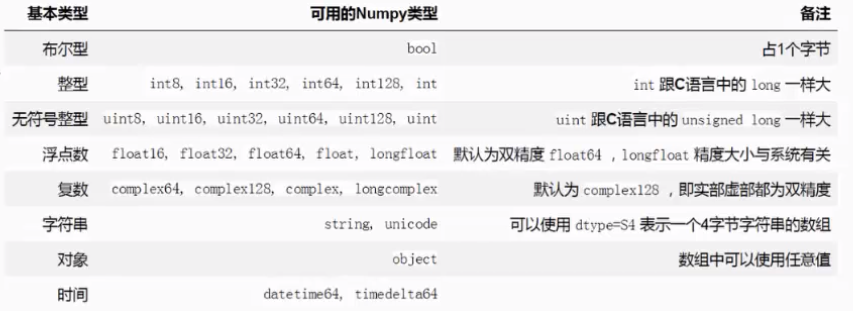

## 类型转换

In [94]:
a = np.array([1.5, -3], dtype = float)
a

array([ 1.5, -3. ])

## asarray 函数

In [157]:
a = np.array([1,2,3])
np.asarray(a, dtype = float) # 改变数组元素的类型

array([1., 2., 3.])

## astype 方法

astype 方法可以用来改变数组元素的类型，并返回一个新数组：

In [100]:
a = np.array([1, 2, 3])
b = a.astype(float)

In [101]:
b[0] = 0.5
b

array([0.5, 2. , 3. ])

In [102]:
a

array([1, 2, 3])

# 3.数组操作

我们以豆瓣10部高分电影为例：

In [107]:
## 电影名称
mv_name=["肖申克的救赎","控方证人","美丽人生 ","阿甘正传","霸王别姬","泰坦尼克号 ","辛德勒的名单","这个杀手不太冷","灿烂人生","疯狂动物城"]

In [104]:
## 评分人数
mv_num = np.array([692795,42995,327855,580897,478523,157074,306904,662552,284652,159302])

In [105]:
## 评分
mv_score = np.array([9.6,9.5,9.5,9.4,9.4,9.4,9.4,9.3,9.3,9.3])

In [106]:
## 电影时长（分钟）
mv_length = np.array([142, 116, 116, 142, 171, 194, 195, 133, 109, 92])

## 数组排序

### sort 函数

In [108]:
np.sort(mv_num)

array([ 42995, 157074, 159302, 284652, 306904, 327855, 478523, 580897,
       662552, 692795])

In [109]:
mv_num ## 数组本身并没有改变

array([692795,  42995, 327855, 580897, 478523, 157074, 306904, 662552,
       284652, 159302])

### argsort 函数

argsort 函数返回从小到大的排列在数组中的索引位置：

In [110]:
order = np.argsort(mv_num)
order

array([1, 5, 9, 8, 6, 2, 4, 3, 7, 0], dtype=int64)

In [114]:
## 利用order查看评分人数最高的电影名称
mv_name[order[-1]]

'肖申克的救赎'

## 求和

In [115]:
np.sum(mv_num)

3693549

In [116]:
mv_num.sum()

3693549

## 最大值

In [117]:
np.max(mv_length) # 最长放映时间

195

In [118]:
mv_length.max()

195

## 最小值

In [119]:
np.min(mv_score)

9.3

In [120]:
mv_score.min()

9.3

## 均值

In [121]:
np.mean(mv_length)

141.0

In [123]:
mv_length.mean()

141.0

## 标准差

In [124]:
np.std(mv_length)

33.713498780162226

In [125]:
mv_length.std()

33.713498780162226

## 相关系数矩阵

In [126]:
np.cov(mv_score, mv_length)

array([[9.88888889e-03, 4.55555556e-01],
       [4.55555556e-01, 1.26288889e+03]])

# 多维数组操作

## 数组形状

In [128]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [129]:
a.shape = 2,3 # 变成2*3 的二维数组，直接在原数组上修改
a

array([[0, 1, 2],
       [3, 4, 5]])

In [130]:
a.shape

(2, 3)

与之对应的方法是`reshape`，但它不会修改原来数组的值，而是返回一个新的数组：

In [132]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [133]:
a.reshape(2,3) # 不会改变原来的数组

array([[0, 1, 2],
       [3, 4, 5]])

In [134]:
a

array([0, 1, 2, 3, 4, 5])

## 转置

In [135]:
a = a.reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [136]:
a.T # 转置 不改变原数组

array([[0, 3],
       [1, 4],
       [2, 5]])

In [137]:
a.transpose() # 转置 不改变原数组

array([[0, 3],
       [1, 4],
       [2, 5]])

In [138]:
a 

array([[0, 1, 2],
       [3, 4, 5]])

## 数组连接

有时我们需要将不同的数组按照一定的顺序连接起来：
`concatenate((a0,a1,...,aN), axis = 0)`

注意，这些数组要用()包括到一个元组中去。
除了给定的轴外，这些数组其他轴的长度必须是一样的。

In [140]:
x = np.array([[0,1,2],[10,11,12]])
y = np.array([[50,51,52],[60,61,62]])
print(x.shape)
print(y.shape)

(2, 3)
(2, 3)


默认沿着第一维进行连接：

In [141]:
z = np.concatenate((x,y))
z

array([[ 0,  1,  2],
       [10, 11, 12],
       [50, 51, 52],
       [60, 61, 62]])

沿着第二维进行连接：

In [142]:
z = np.concatenate((x,y),axis =1)
z

array([[ 0,  1,  2, 50, 51, 52],
       [10, 11, 12, 60, 61, 62]])

注意到这里x和y的形状是一样的，还可以将它们连接成三维的数组，但是concatenate不能提供这样的功能，不过可以这样：

In [143]:
z = np.array((x,y))
z

array([[[ 0,  1,  2],
        [10, 11, 12]],

       [[50, 51, 52],
        [60, 61, 62]]])

事实上，Numpy提供了分别对应这三种情况的函数：
* vstack
* hstack
* dstack

In [145]:
np.vstack((x,y))

array([[ 0,  1,  2],
       [10, 11, 12],
       [50, 51, 52],
       [60, 61, 62]])

In [146]:
np.hstack((x,y))

array([[ 0,  1,  2, 50, 51, 52],
       [10, 11, 12, 60, 61, 62]])

In [147]:
np.dstack((x,y))

array([[[ 0, 50],
        [ 1, 51],
        [ 2, 52]],

       [[10, 60],
        [11, 61],
        [12, 62]]])

# numpy内置函数

In [148]:
a = np.array([-1, 2, 3, -2])

In [149]:
np.abs(a)

array([1, 2, 3, 2])

In [150]:
np.exp(a)

array([ 0.36787944,  7.3890561 , 20.08553692,  0.13533528])

In [151]:
np.median(a) # 中值

0.5

In [152]:
np.cumsum(a) # 求累计和

array([-1,  1,  4,  2], dtype=int32)